## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import numpy as np

## Import Dataset 


In [3]:
n_features = 8
n_samples= 20640
n_target = 1 
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.604
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              3148.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:24:31   Log-Likelihood:                         -15751.
No. Observations:               16512   AIC:                                  3.152e+04
Df Residuals:                   16504   BIC:                                  3.158e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

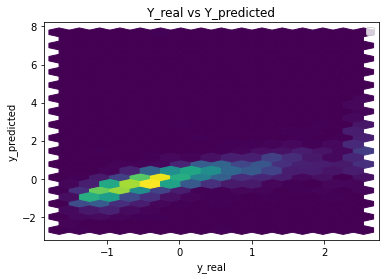

Performance Metrics
Mean Squared Error: 0.39366754355304406
Mean Absolute Error: 0.4588736396910953
Manhattan distance: 1894.2303846448426
Euclidean distance: 40.31202822715526


Stats Model MAE 0.4588736396910953


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MAE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.063766
0:	learn: 0.9629854	total: 49.1ms	remaining: 49.1s
1:	learn: 0.9314922	total: 51.3ms	remaining: 25.6s
2:	learn: 0.9016973	total: 53.4ms	remaining: 17.8s
3:	learn: 0.8743758	total: 56.5ms	remaining: 14.1s
4:	learn: 0.8492626	total: 59.3ms	remaining: 11.8s
5:	learn: 0.8261826	total: 62.4ms	remaining: 10.3s
6:	learn: 0.8043267	total: 64.7ms	remaining: 9.18s
7:	learn: 0.7842376	total: 66.6ms	remaining: 8.26s
8:	learn: 0.7671763	total: 68.8ms	remaining: 7.57s
9:	learn: 0.7484366	total: 70.9ms	remaining: 7.02s
10:	learn: 0.7322555	total: 72.9ms	remaining: 6.56s
11:	learn: 0.7166267	total: 75.2ms	remaining: 6.19s
12:	learn: 0.7034631	total: 77.3ms	remaining: 5.87s
13:	learn: 0.6889492	total: 79.3ms	remaining: 5.59s
14:	learn: 0.6761047	total: 81.4ms	remaining: 5.35s
15:	learn: 0.6645045	total: 83.5ms	remaining: 5.13s
16:	learn: 0.6548502	total: 85.7ms	remaining: 4.95s


17:	learn: 0.6448994	total: 87.8ms	remaining: 4.79s
18:	learn: 0.6366312	total: 90.3ms	remaining: 4.66s
19:	learn: 0.6291653	total: 92.3ms	remaining: 4.53s
20:	learn: 0.6218379	total: 94.6ms	remaining: 4.41s
21:	learn: 0.6144006	total: 96.5ms	remaining: 4.29s
22:	learn: 0.6055538	total: 98.6ms	remaining: 4.19s
23:	learn: 0.5997449	total: 101ms	remaining: 4.09s
24:	learn: 0.5923472	total: 103ms	remaining: 4.01s


25:	learn: 0.5868168	total: 105ms	remaining: 3.95s
26:	learn: 0.5813246	total: 108ms	remaining: 3.88s
27:	learn: 0.5744800	total: 110ms	remaining: 3.81s
28:	learn: 0.5684560	total: 112ms	remaining: 3.74s
29:	learn: 0.5639461	total: 114ms	remaining: 3.67s
30:	learn: 0.5600970	total: 116ms	remaining: 3.62s
31:	learn: 0.5559070	total: 118ms	remaining: 3.57s
32:	learn: 0.5510611	total: 120ms	remaining: 3.52s
33:	learn: 0.5478587	total: 122ms	remaining: 3.47s
34:	learn: 0.5434520	total: 124ms	remaining: 3.42s
35:	learn: 0.5398393	total: 126ms	remaining: 3.38s
36:	learn: 0.5366474	total: 128ms	remaining: 3.34s
37:	learn: 0.5323153	total: 130ms	remaining: 3.3s
38:	learn: 0.5296272	total: 132ms	remaining: 3.26s
39:	learn: 0.5277998	total: 134ms	remaining: 3.22s
40:	learn: 0.5257070	total: 137ms	remaining: 3.2s
41:	learn: 0.5235827	total: 139ms	remaining: 3.16s
42:	learn: 0.5208618	total: 141ms	remaining: 3.13s
43:	learn: 0.5176703	total: 143ms	remaining: 3.1s
44:	learn: 0.5159474	total: 145ms	

52:	learn: 0.4986369	total: 163ms	remaining: 2.91s
53:	learn: 0.4967430	total: 165ms	remaining: 2.89s
54:	learn: 0.4940086	total: 167ms	remaining: 2.87s
55:	learn: 0.4921457	total: 169ms	remaining: 2.85s
56:	learn: 0.4903470	total: 171ms	remaining: 2.83s
57:	learn: 0.4890788	total: 173ms	remaining: 2.81s
58:	learn: 0.4880613	total: 175ms	remaining: 2.79s
59:	learn: 0.4869250	total: 177ms	remaining: 2.78s
60:	learn: 0.4855732	total: 180ms	remaining: 2.77s
61:	learn: 0.4844382	total: 182ms	remaining: 2.75s
62:	learn: 0.4835143	total: 184ms	remaining: 2.73s
63:	learn: 0.4816279	total: 186ms	remaining: 2.72s
64:	learn: 0.4803472	total: 188ms	remaining: 2.7s
65:	learn: 0.4795979	total: 190ms	remaining: 2.69s
66:	learn: 0.4782071	total: 192ms	remaining: 2.68s
67:	learn: 0.4773623	total: 195ms	remaining: 2.67s
68:	learn: 0.4767009	total: 197ms	remaining: 2.65s
69:	learn: 0.4759105	total: 199ms	remaining: 2.64s
70:	learn: 0.4753967	total: 201ms	remaining: 2.63s
71:	learn: 0.4730705	total: 203m

92:	learn: 0.4551740	total: 248ms	remaining: 2.42s
93:	learn: 0.4539675	total: 250ms	remaining: 2.41s
94:	learn: 0.4531670	total: 252ms	remaining: 2.4s
95:	learn: 0.4524029	total: 254ms	remaining: 2.4s
96:	learn: 0.4517846	total: 257ms	remaining: 2.39s
97:	learn: 0.4512660	total: 259ms	remaining: 2.38s
98:	learn: 0.4502166	total: 261ms	remaining: 2.37s


99:	learn: 0.4494050	total: 263ms	remaining: 2.36s
100:	learn: 0.4485207	total: 265ms	remaining: 2.36s
101:	learn: 0.4478749	total: 267ms	remaining: 2.35s
102:	learn: 0.4475178	total: 270ms	remaining: 2.35s
103:	learn: 0.4467607	total: 272ms	remaining: 2.34s
104:	learn: 0.4461820	total: 274ms	remaining: 2.33s
105:	learn: 0.4454547	total: 276ms	remaining: 2.33s
106:	learn: 0.4449660	total: 278ms	remaining: 2.32s
107:	learn: 0.4446255	total: 280ms	remaining: 2.31s
108:	learn: 0.4441799	total: 282ms	remaining: 2.31s
109:	learn: 0.4434940	total: 284ms	remaining: 2.3s
110:	learn: 0.4431275	total: 286ms	remaining: 2.29s
111:	learn: 0.4424316	total: 288ms	remaining: 2.28s
112:	learn: 0.4414955	total: 290ms	remaining: 2.28s
113:	learn: 0.4410620	total: 292ms	remaining: 2.27s
114:	learn: 0.4406818	total: 294ms	remaining: 2.26s
115:	learn: 0.4403515	total: 296ms	remaining: 2.26s
116:	learn: 0.4401495	total: 298ms	remaining: 2.25s
117:	learn: 0.4397420	total: 300ms	remaining: 2.24s
118:	learn: 0.

128:	learn: 0.4337141	total: 323ms	remaining: 2.18s
129:	learn: 0.4333713	total: 325ms	remaining: 2.18s
130:	learn: 0.4329869	total: 327ms	remaining: 2.17s
131:	learn: 0.4325990	total: 329ms	remaining: 2.16s
132:	learn: 0.4320017	total: 331ms	remaining: 2.16s
133:	learn: 0.4315485	total: 333ms	remaining: 2.15s
134:	learn: 0.4309521	total: 335ms	remaining: 2.15s
135:	learn: 0.4305306	total: 337ms	remaining: 2.14s
136:	learn: 0.4302413	total: 339ms	remaining: 2.14s
137:	learn: 0.4296475	total: 341ms	remaining: 2.13s
138:	learn: 0.4294056	total: 343ms	remaining: 2.13s
139:	learn: 0.4291486	total: 346ms	remaining: 2.12s
140:	learn: 0.4289179	total: 348ms	remaining: 2.12s
141:	learn: 0.4284141	total: 350ms	remaining: 2.11s
142:	learn: 0.4279614	total: 352ms	remaining: 2.11s
143:	learn: 0.4277263	total: 354ms	remaining: 2.1s
144:	learn: 0.4274824	total: 356ms	remaining: 2.1s
145:	learn: 0.4271736	total: 358ms	remaining: 2.1s
146:	learn: 0.4268822	total: 360ms	remaining: 2.09s
147:	learn: 0.4

169:	learn: 0.4166053	total: 410ms	remaining: 2s
170:	learn: 0.4161724	total: 412ms	remaining: 2s
171:	learn: 0.4158389	total: 414ms	remaining: 1.99s
172:	learn: 0.4155335	total: 416ms	remaining: 1.99s
173:	learn: 0.4151068	total: 418ms	remaining: 1.98s
174:	learn: 0.4147699	total: 420ms	remaining: 1.98s
175:	learn: 0.4144127	total: 422ms	remaining: 1.98s


176:	learn: 0.4139318	total: 424ms	remaining: 1.97s
177:	learn: 0.4134591	total: 426ms	remaining: 1.97s
178:	learn: 0.4131906	total: 428ms	remaining: 1.96s
179:	learn: 0.4126969	total: 431ms	remaining: 1.96s
180:	learn: 0.4124292	total: 433ms	remaining: 1.96s
181:	learn: 0.4120971	total: 435ms	remaining: 1.96s
182:	learn: 0.4117564	total: 437ms	remaining: 1.95s
183:	learn: 0.4112229	total: 439ms	remaining: 1.95s
184:	learn: 0.4108513	total: 442ms	remaining: 1.95s
185:	learn: 0.4102049	total: 444ms	remaining: 1.94s
186:	learn: 0.4098033	total: 446ms	remaining: 1.94s
187:	learn: 0.4095292	total: 448ms	remaining: 1.93s
188:	learn: 0.4090485	total: 450ms	remaining: 1.93s
189:	learn: 0.4088024	total: 452ms	remaining: 1.93s
190:	learn: 0.4084058	total: 454ms	remaining: 1.92s
191:	learn: 0.4079963	total: 456ms	remaining: 1.92s
192:	learn: 0.4076832	total: 458ms	remaining: 1.91s
193:	learn: 0.4069657	total: 460ms	remaining: 1.91s
194:	learn: 0.4065962	total: 462ms	remaining: 1.91s
195:	learn: 

205:	learn: 0.4032785	total: 484ms	remaining: 1.87s
206:	learn: 0.4030187	total: 486ms	remaining: 1.86s
207:	learn: 0.4026240	total: 488ms	remaining: 1.86s
208:	learn: 0.4022823	total: 491ms	remaining: 1.86s
209:	learn: 0.4017767	total: 493ms	remaining: 1.85s
210:	learn: 0.4014677	total: 495ms	remaining: 1.85s
211:	learn: 0.4011886	total: 497ms	remaining: 1.85s
212:	learn: 0.4008038	total: 499ms	remaining: 1.84s
213:	learn: 0.4004712	total: 502ms	remaining: 1.84s
214:	learn: 0.4002136	total: 504ms	remaining: 1.84s
215:	learn: 0.3998788	total: 506ms	remaining: 1.83s
216:	learn: 0.3995851	total: 508ms	remaining: 1.83s
217:	learn: 0.3992648	total: 510ms	remaining: 1.83s
218:	learn: 0.3989551	total: 512ms	remaining: 1.82s
219:	learn: 0.3986987	total: 514ms	remaining: 1.82s
220:	learn: 0.3983566	total: 516ms	remaining: 1.82s
221:	learn: 0.3980231	total: 518ms	remaining: 1.81s
222:	learn: 0.3977316	total: 520ms	remaining: 1.81s
223:	learn: 0.3973527	total: 522ms	remaining: 1.81s
224:	learn: 

246:	learn: 0.3908069	total: 571ms	remaining: 1.74s
247:	learn: 0.3905457	total: 574ms	remaining: 1.74s
248:	learn: 0.3902647	total: 576ms	remaining: 1.74s
249:	learn: 0.3899636	total: 578ms	remaining: 1.73s
250:	learn: 0.3898169	total: 580ms	remaining: 1.73s
251:	learn: 0.3893523	total: 582ms	remaining: 1.73s
252:	learn: 0.3890430	total: 584ms	remaining: 1.72s


253:	learn: 0.3887794	total: 586ms	remaining: 1.72s
254:	learn: 0.3885606	total: 589ms	remaining: 1.72s
255:	learn: 0.3883644	total: 591ms	remaining: 1.72s
256:	learn: 0.3881970	total: 593ms	remaining: 1.71s
257:	learn: 0.3879152	total: 595ms	remaining: 1.71s
258:	learn: 0.3876010	total: 597ms	remaining: 1.71s
259:	learn: 0.3874520	total: 599ms	remaining: 1.7s
260:	learn: 0.3872342	total: 601ms	remaining: 1.7s
261:	learn: 0.3867598	total: 603ms	remaining: 1.7s
262:	learn: 0.3863820	total: 605ms	remaining: 1.7s
263:	learn: 0.3862047	total: 607ms	remaining: 1.69s
264:	learn: 0.3859410	total: 609ms	remaining: 1.69s
265:	learn: 0.3857135	total: 611ms	remaining: 1.69s
266:	learn: 0.3855938	total: 613ms	remaining: 1.68s
267:	learn: 0.3853471	total: 615ms	remaining: 1.68s
268:	learn: 0.3851952	total: 617ms	remaining: 1.68s
269:	learn: 0.3849256	total: 620ms	remaining: 1.68s
270:	learn: 0.3846025	total: 622ms	remaining: 1.67s
271:	learn: 0.3843868	total: 625ms	remaining: 1.67s
272:	learn: 0.38

280:	learn: 0.3821202	total: 646ms	remaining: 1.65s
281:	learn: 0.3819976	total: 648ms	remaining: 1.65s
282:	learn: 0.3817715	total: 650ms	remaining: 1.65s
283:	learn: 0.3816036	total: 653ms	remaining: 1.65s
284:	learn: 0.3813612	total: 655ms	remaining: 1.64s
285:	learn: 0.3811862	total: 657ms	remaining: 1.64s
286:	learn: 0.3809445	total: 659ms	remaining: 1.64s
287:	learn: 0.3808024	total: 661ms	remaining: 1.63s
288:	learn: 0.3805699	total: 664ms	remaining: 1.63s
289:	learn: 0.3803681	total: 666ms	remaining: 1.63s
290:	learn: 0.3800397	total: 668ms	remaining: 1.63s
291:	learn: 0.3798668	total: 671ms	remaining: 1.63s
292:	learn: 0.3795960	total: 673ms	remaining: 1.62s
293:	learn: 0.3792861	total: 676ms	remaining: 1.62s
294:	learn: 0.3790653	total: 679ms	remaining: 1.62s
295:	learn: 0.3788087	total: 681ms	remaining: 1.62s
296:	learn: 0.3786280	total: 683ms	remaining: 1.61s
297:	learn: 0.3783651	total: 685ms	remaining: 1.61s
298:	learn: 0.3781233	total: 687ms	remaining: 1.61s
299:	learn: 

320:	learn: 0.3731762	total: 732ms	remaining: 1.55s
321:	learn: 0.3729621	total: 734ms	remaining: 1.54s
322:	learn: 0.3727401	total: 736ms	remaining: 1.54s
323:	learn: 0.3724241	total: 739ms	remaining: 1.54s
324:	learn: 0.3722202	total: 740ms	remaining: 1.54s
325:	learn: 0.3720278	total: 742ms	remaining: 1.53s
326:	learn: 0.3718348	total: 744ms	remaining: 1.53s
327:	learn: 0.3716374	total: 746ms	remaining: 1.53s


328:	learn: 0.3714911	total: 750ms	remaining: 1.53s
329:	learn: 0.3712934	total: 752ms	remaining: 1.53s
330:	learn: 0.3710966	total: 754ms	remaining: 1.52s
331:	learn: 0.3707118	total: 756ms	remaining: 1.52s
332:	learn: 0.3704848	total: 758ms	remaining: 1.52s
333:	learn: 0.3703016	total: 760ms	remaining: 1.51s
334:	learn: 0.3700184	total: 762ms	remaining: 1.51s
335:	learn: 0.3697874	total: 765ms	remaining: 1.51s
336:	learn: 0.3695568	total: 767ms	remaining: 1.51s
337:	learn: 0.3693763	total: 769ms	remaining: 1.51s
338:	learn: 0.3692345	total: 771ms	remaining: 1.5s
339:	learn: 0.3690213	total: 773ms	remaining: 1.5s
340:	learn: 0.3687944	total: 775ms	remaining: 1.5s
341:	learn: 0.3685926	total: 777ms	remaining: 1.5s
342:	learn: 0.3684553	total: 779ms	remaining: 1.49s
343:	learn: 0.3682939	total: 781ms	remaining: 1.49s
344:	learn: 0.3681400	total: 783ms	remaining: 1.49s
345:	learn: 0.3679212	total: 785ms	remaining: 1.48s
346:	learn: 0.3677696	total: 787ms	remaining: 1.48s
347:	learn: 0.36

357:	learn: 0.3656302	total: 810ms	remaining: 1.45s
358:	learn: 0.3654311	total: 812ms	remaining: 1.45s
359:	learn: 0.3652488	total: 814ms	remaining: 1.45s
360:	learn: 0.3648996	total: 816ms	remaining: 1.44s
361:	learn: 0.3647462	total: 818ms	remaining: 1.44s
362:	learn: 0.3645448	total: 820ms	remaining: 1.44s
363:	learn: 0.3643365	total: 822ms	remaining: 1.44s
364:	learn: 0.3642286	total: 824ms	remaining: 1.43s
365:	learn: 0.3640420	total: 826ms	remaining: 1.43s
366:	learn: 0.3638854	total: 828ms	remaining: 1.43s
367:	learn: 0.3637491	total: 830ms	remaining: 1.43s
368:	learn: 0.3635959	total: 832ms	remaining: 1.42s
369:	learn: 0.3634635	total: 834ms	remaining: 1.42s
370:	learn: 0.3632581	total: 836ms	remaining: 1.42s
371:	learn: 0.3631544	total: 838ms	remaining: 1.42s
372:	learn: 0.3629862	total: 840ms	remaining: 1.41s
373:	learn: 0.3628310	total: 842ms	remaining: 1.41s
374:	learn: 0.3626885	total: 844ms	remaining: 1.41s
375:	learn: 0.3624924	total: 846ms	remaining: 1.4s
376:	learn: 0

400:	learn: 0.3580583	total: 897ms	remaining: 1.34s
401:	learn: 0.3579364	total: 899ms	remaining: 1.34s
402:	learn: 0.3577820	total: 901ms	remaining: 1.33s
403:	learn: 0.3575684	total: 903ms	remaining: 1.33s
404:	learn: 0.3574245	total: 905ms	remaining: 1.33s
405:	learn: 0.3572668	total: 908ms	remaining: 1.33s
406:	learn: 0.3570503	total: 910ms	remaining: 1.32s
407:	learn: 0.3569056	total: 912ms	remaining: 1.32s


408:	learn: 0.3567381	total: 914ms	remaining: 1.32s
409:	learn: 0.3566201	total: 917ms	remaining: 1.32s
410:	learn: 0.3564797	total: 919ms	remaining: 1.32s
411:	learn: 0.3563945	total: 921ms	remaining: 1.31s
412:	learn: 0.3562309	total: 923ms	remaining: 1.31s
413:	learn: 0.3560864	total: 925ms	remaining: 1.31s
414:	learn: 0.3558960	total: 927ms	remaining: 1.31s
415:	learn: 0.3555912	total: 930ms	remaining: 1.3s
416:	learn: 0.3554542	total: 932ms	remaining: 1.3s
417:	learn: 0.3553144	total: 934ms	remaining: 1.3s
418:	learn: 0.3551822	total: 936ms	remaining: 1.3s
419:	learn: 0.3550374	total: 937ms	remaining: 1.29s
420:	learn: 0.3548579	total: 939ms	remaining: 1.29s
421:	learn: 0.3547117	total: 942ms	remaining: 1.29s
422:	learn: 0.3545733	total: 943ms	remaining: 1.29s
423:	learn: 0.3544860	total: 945ms	remaining: 1.28s
424:	learn: 0.3541721	total: 948ms	remaining: 1.28s
425:	learn: 0.3540463	total: 950ms	remaining: 1.28s
426:	learn: 0.3538796	total: 952ms	remaining: 1.28s
427:	learn: 0.35

437:	learn: 0.3522338	total: 975ms	remaining: 1.25s
438:	learn: 0.3521093	total: 977ms	remaining: 1.25s
439:	learn: 0.3518845	total: 979ms	remaining: 1.25s
440:	learn: 0.3517375	total: 981ms	remaining: 1.24s
441:	learn: 0.3514446	total: 983ms	remaining: 1.24s
442:	learn: 0.3512863	total: 985ms	remaining: 1.24s
443:	learn: 0.3512233	total: 987ms	remaining: 1.24s
444:	learn: 0.3511150	total: 989ms	remaining: 1.23s
445:	learn: 0.3509300	total: 991ms	remaining: 1.23s
446:	learn: 0.3508145	total: 993ms	remaining: 1.23s
447:	learn: 0.3506825	total: 995ms	remaining: 1.23s
448:	learn: 0.3505432	total: 997ms	remaining: 1.22s
449:	learn: 0.3504308	total: 999ms	remaining: 1.22s
450:	learn: 0.3502707	total: 1s	remaining: 1.22s
451:	learn: 0.3501139	total: 1s	remaining: 1.22s
452:	learn: 0.3499605	total: 1s	remaining: 1.21s
453:	learn: 0.3497680	total: 1.01s	remaining: 1.21s
454:	learn: 0.3495909	total: 1.01s	remaining: 1.21s
455:	learn: 0.3494441	total: 1.01s	remaining: 1.21s
456:	learn: 0.3492581

479:	learn: 0.3459388	total: 1.06s	remaining: 1.15s
480:	learn: 0.3457660	total: 1.06s	remaining: 1.15s
481:	learn: 0.3456409	total: 1.06s	remaining: 1.14s
482:	learn: 0.3454911	total: 1.07s	remaining: 1.14s
483:	learn: 0.3453688	total: 1.07s	remaining: 1.14s
484:	learn: 0.3452651	total: 1.07s	remaining: 1.14s
485:	learn: 0.3451045	total: 1.07s	remaining: 1.13s
486:	learn: 0.3449498	total: 1.07s	remaining: 1.13s


487:	learn: 0.3448408	total: 1.08s	remaining: 1.13s
488:	learn: 0.3446757	total: 1.08s	remaining: 1.13s
489:	learn: 0.3445033	total: 1.08s	remaining: 1.13s
490:	learn: 0.3443948	total: 1.08s	remaining: 1.12s
491:	learn: 0.3442033	total: 1.08s	remaining: 1.12s
492:	learn: 0.3440796	total: 1.09s	remaining: 1.12s
493:	learn: 0.3439687	total: 1.09s	remaining: 1.12s
494:	learn: 0.3438359	total: 1.09s	remaining: 1.11s
495:	learn: 0.3436714	total: 1.09s	remaining: 1.11s
496:	learn: 0.3435852	total: 1.09s	remaining: 1.11s
497:	learn: 0.3434097	total: 1.1s	remaining: 1.11s
498:	learn: 0.3432563	total: 1.1s	remaining: 1.1s
499:	learn: 0.3431378	total: 1.1s	remaining: 1.1s
500:	learn: 0.3429521	total: 1.1s	remaining: 1.1s
501:	learn: 0.3428203	total: 1.1s	remaining: 1.1s
502:	learn: 0.3426848	total: 1.11s	remaining: 1.09s
503:	learn: 0.3425986	total: 1.11s	remaining: 1.09s
504:	learn: 0.3424905	total: 1.11s	remaining: 1.09s
505:	learn: 0.3423276	total: 1.11s	remaining: 1.09s
506:	learn: 0.3421633

516:	learn: 0.3410631	total: 1.14s	remaining: 1.06s
517:	learn: 0.3409910	total: 1.14s	remaining: 1.06s
518:	learn: 0.3408837	total: 1.14s	remaining: 1.06s
519:	learn: 0.3407378	total: 1.14s	remaining: 1.05s
520:	learn: 0.3406193	total: 1.14s	remaining: 1.05s
521:	learn: 0.3405150	total: 1.15s	remaining: 1.05s
522:	learn: 0.3403928	total: 1.15s	remaining: 1.05s
523:	learn: 0.3403047	total: 1.15s	remaining: 1.04s
524:	learn: 0.3401742	total: 1.15s	remaining: 1.04s
525:	learn: 0.3399932	total: 1.15s	remaining: 1.04s
526:	learn: 0.3398472	total: 1.16s	remaining: 1.04s
527:	learn: 0.3396230	total: 1.16s	remaining: 1.04s
528:	learn: 0.3395072	total: 1.16s	remaining: 1.03s
529:	learn: 0.3393701	total: 1.16s	remaining: 1.03s
530:	learn: 0.3392667	total: 1.17s	remaining: 1.03s
531:	learn: 0.3391398	total: 1.17s	remaining: 1.03s
532:	learn: 0.3390110	total: 1.17s	remaining: 1.02s
533:	learn: 0.3388919	total: 1.17s	remaining: 1.02s
534:	learn: 0.3387351	total: 1.17s	remaining: 1.02s
535:	learn: 

558:	learn: 0.3358488	total: 1.22s	remaining: 965ms
559:	learn: 0.3357032	total: 1.22s	remaining: 962ms
560:	learn: 0.3356185	total: 1.23s	remaining: 960ms
561:	learn: 0.3355354	total: 1.23s	remaining: 958ms
562:	learn: 0.3354650	total: 1.23s	remaining: 955ms
563:	learn: 0.3353510	total: 1.23s	remaining: 953ms
564:	learn: 0.3351346	total: 1.23s	remaining: 951ms


565:	learn: 0.3349887	total: 1.24s	remaining: 948ms
566:	learn: 0.3348541	total: 1.24s	remaining: 946ms
567:	learn: 0.3347685	total: 1.24s	remaining: 944ms
568:	learn: 0.3346697	total: 1.24s	remaining: 942ms
569:	learn: 0.3346114	total: 1.25s	remaining: 940ms
570:	learn: 0.3344608	total: 1.25s	remaining: 937ms
571:	learn: 0.3343467	total: 1.25s	remaining: 935ms
572:	learn: 0.3342590	total: 1.25s	remaining: 933ms
573:	learn: 0.3341517	total: 1.25s	remaining: 931ms
574:	learn: 0.3340067	total: 1.25s	remaining: 928ms
575:	learn: 0.3338837	total: 1.26s	remaining: 926ms
576:	learn: 0.3338033	total: 1.26s	remaining: 924ms
577:	learn: 0.3336873	total: 1.26s	remaining: 922ms
578:	learn: 0.3335443	total: 1.26s	remaining: 919ms
579:	learn: 0.3334419	total: 1.27s	remaining: 917ms
580:	learn: 0.3334010	total: 1.27s	remaining: 915ms
581:	learn: 0.3332886	total: 1.27s	remaining: 913ms
582:	learn: 0.3331626	total: 1.27s	remaining: 910ms
583:	learn: 0.3330874	total: 1.27s	remaining: 908ms
584:	learn: 

594:	learn: 0.3317326	total: 1.3s	remaining: 883ms
595:	learn: 0.3316545	total: 1.3s	remaining: 881ms
596:	learn: 0.3315099	total: 1.3s	remaining: 879ms
597:	learn: 0.3313891	total: 1.3s	remaining: 876ms
598:	learn: 0.3312906	total: 1.3s	remaining: 874ms
599:	learn: 0.3311780	total: 1.31s	remaining: 872ms
600:	learn: 0.3310573	total: 1.31s	remaining: 870ms
601:	learn: 0.3309199	total: 1.31s	remaining: 867ms
602:	learn: 0.3306817	total: 1.31s	remaining: 865ms
603:	learn: 0.3306109	total: 1.32s	remaining: 863ms
604:	learn: 0.3305117	total: 1.32s	remaining: 861ms
605:	learn: 0.3303606	total: 1.32s	remaining: 859ms
606:	learn: 0.3302560	total: 1.32s	remaining: 856ms
607:	learn: 0.3301247	total: 1.32s	remaining: 854ms
608:	learn: 0.3300480	total: 1.33s	remaining: 852ms
609:	learn: 0.3299537	total: 1.33s	remaining: 850ms
610:	learn: 0.3298147	total: 1.33s	remaining: 847ms
611:	learn: 0.3297101	total: 1.33s	remaining: 845ms
612:	learn: 0.3295816	total: 1.33s	remaining: 843ms
613:	learn: 0.329

636:	learn: 0.3270052	total: 1.38s	remaining: 789ms
637:	learn: 0.3268407	total: 1.39s	remaining: 787ms
638:	learn: 0.3266985	total: 1.39s	remaining: 785ms
639:	learn: 0.3266159	total: 1.39s	remaining: 782ms
640:	learn: 0.3265104	total: 1.39s	remaining: 780ms
641:	learn: 0.3264332	total: 1.4s	remaining: 778ms


642:	learn: 0.3263338	total: 1.4s	remaining: 776ms
643:	learn: 0.3261991	total: 1.4s	remaining: 774ms
644:	learn: 0.3261015	total: 1.4s	remaining: 772ms
645:	learn: 0.3260425	total: 1.4s	remaining: 769ms
646:	learn: 0.3259364	total: 1.41s	remaining: 767ms
647:	learn: 0.3258681	total: 1.41s	remaining: 765ms
648:	learn: 0.3257531	total: 1.41s	remaining: 763ms
649:	learn: 0.3255910	total: 1.41s	remaining: 761ms
650:	learn: 0.3254780	total: 1.41s	remaining: 758ms
651:	learn: 0.3253796	total: 1.42s	remaining: 756ms
652:	learn: 0.3252964	total: 1.42s	remaining: 754ms
653:	learn: 0.3251558	total: 1.42s	remaining: 752ms
654:	learn: 0.3250317	total: 1.42s	remaining: 750ms
655:	learn: 0.3249382	total: 1.43s	remaining: 748ms
656:	learn: 0.3248062	total: 1.43s	remaining: 745ms
657:	learn: 0.3246900	total: 1.43s	remaining: 743ms
658:	learn: 0.3246045	total: 1.43s	remaining: 741ms
659:	learn: 0.3245120	total: 1.43s	remaining: 739ms
660:	learn: 0.3243944	total: 1.44s	remaining: 737ms
661:	learn: 0.32

671:	learn: 0.3233460	total: 1.46s	remaining: 712ms
672:	learn: 0.3232588	total: 1.46s	remaining: 710ms
673:	learn: 0.3231577	total: 1.46s	remaining: 708ms
674:	learn: 0.3230492	total: 1.46s	remaining: 705ms
675:	learn: 0.3229614	total: 1.47s	remaining: 703ms
676:	learn: 0.3229095	total: 1.47s	remaining: 701ms
677:	learn: 0.3228380	total: 1.47s	remaining: 699ms
678:	learn: 0.3227463	total: 1.47s	remaining: 696ms
679:	learn: 0.3226688	total: 1.48s	remaining: 694ms
680:	learn: 0.3225818	total: 1.48s	remaining: 692ms
681:	learn: 0.3224904	total: 1.48s	remaining: 690ms
682:	learn: 0.3223694	total: 1.48s	remaining: 688ms
683:	learn: 0.3222696	total: 1.48s	remaining: 686ms
684:	learn: 0.3221903	total: 1.49s	remaining: 684ms
685:	learn: 0.3220920	total: 1.49s	remaining: 682ms
686:	learn: 0.3219166	total: 1.49s	remaining: 680ms
687:	learn: 0.3218180	total: 1.49s	remaining: 678ms
688:	learn: 0.3216912	total: 1.5s	remaining: 676ms
689:	learn: 0.3215695	total: 1.5s	remaining: 673ms
690:	learn: 0.

712:	learn: 0.3191225	total: 1.55s	remaining: 623ms
713:	learn: 0.3190380	total: 1.55s	remaining: 621ms
714:	learn: 0.3189623	total: 1.55s	remaining: 619ms
715:	learn: 0.3188232	total: 1.55s	remaining: 617ms
716:	learn: 0.3187214	total: 1.56s	remaining: 615ms


717:	learn: 0.3186851	total: 1.56s	remaining: 613ms
718:	learn: 0.3186039	total: 1.56s	remaining: 611ms
719:	learn: 0.3185638	total: 1.56s	remaining: 609ms
720:	learn: 0.3184553	total: 1.57s	remaining: 606ms
721:	learn: 0.3183845	total: 1.57s	remaining: 604ms
722:	learn: 0.3182966	total: 1.57s	remaining: 602ms
723:	learn: 0.3181349	total: 1.57s	remaining: 600ms
724:	learn: 0.3180508	total: 1.58s	remaining: 598ms
725:	learn: 0.3179650	total: 1.58s	remaining: 596ms
726:	learn: 0.3178820	total: 1.58s	remaining: 593ms
727:	learn: 0.3177928	total: 1.58s	remaining: 591ms
728:	learn: 0.3177008	total: 1.58s	remaining: 589ms
729:	learn: 0.3176152	total: 1.59s	remaining: 587ms
730:	learn: 0.3175517	total: 1.59s	remaining: 585ms
731:	learn: 0.3174737	total: 1.59s	remaining: 583ms
732:	learn: 0.3174151	total: 1.59s	remaining: 581ms
733:	learn: 0.3173356	total: 1.6s	remaining: 579ms
734:	learn: 0.3172440	total: 1.6s	remaining: 576ms
735:	learn: 0.3171642	total: 1.6s	remaining: 574ms
736:	learn: 0.3

744:	learn: 0.3163882	total: 1.62s	remaining: 555ms
745:	learn: 0.3163028	total: 1.62s	remaining: 553ms
746:	learn: 0.3161468	total: 1.63s	remaining: 551ms
747:	learn: 0.3160975	total: 1.63s	remaining: 549ms
748:	learn: 0.3160023	total: 1.63s	remaining: 546ms
749:	learn: 0.3158632	total: 1.63s	remaining: 544ms
750:	learn: 0.3157616	total: 1.63s	remaining: 542ms
751:	learn: 0.3156118	total: 1.64s	remaining: 540ms
752:	learn: 0.3155543	total: 1.64s	remaining: 538ms
753:	learn: 0.3154690	total: 1.64s	remaining: 536ms
754:	learn: 0.3153557	total: 1.64s	remaining: 533ms
755:	learn: 0.3152913	total: 1.65s	remaining: 531ms
756:	learn: 0.3152092	total: 1.65s	remaining: 529ms
757:	learn: 0.3151440	total: 1.65s	remaining: 527ms
758:	learn: 0.3150831	total: 1.65s	remaining: 525ms
759:	learn: 0.3150016	total: 1.65s	remaining: 522ms
760:	learn: 0.3149268	total: 1.66s	remaining: 520ms
761:	learn: 0.3147616	total: 1.66s	remaining: 518ms
762:	learn: 0.3146884	total: 1.66s	remaining: 516ms
763:	learn: 

785:	learn: 0.3126801	total: 1.71s	remaining: 466ms
786:	learn: 0.3125953	total: 1.71s	remaining: 464ms
787:	learn: 0.3124912	total: 1.72s	remaining: 461ms
788:	learn: 0.3123960	total: 1.72s	remaining: 459ms
789:	learn: 0.3123289	total: 1.72s	remaining: 457ms


790:	learn: 0.3122210	total: 1.72s	remaining: 455ms
791:	learn: 0.3121115	total: 1.72s	remaining: 453ms
792:	learn: 0.3120522	total: 1.73s	remaining: 451ms
793:	learn: 0.3119322	total: 1.73s	remaining: 449ms
794:	learn: 0.3118716	total: 1.73s	remaining: 446ms
795:	learn: 0.3117837	total: 1.73s	remaining: 444ms
796:	learn: 0.3116928	total: 1.73s	remaining: 442ms
797:	learn: 0.3116367	total: 1.74s	remaining: 440ms
798:	learn: 0.3115189	total: 1.74s	remaining: 437ms
799:	learn: 0.3114352	total: 1.74s	remaining: 435ms
800:	learn: 0.3113833	total: 1.74s	remaining: 433ms
801:	learn: 0.3113072	total: 1.75s	remaining: 431ms
802:	learn: 0.3112357	total: 1.75s	remaining: 429ms
803:	learn: 0.3111899	total: 1.75s	remaining: 427ms
804:	learn: 0.3111058	total: 1.75s	remaining: 424ms
805:	learn: 0.3110325	total: 1.75s	remaining: 422ms
806:	learn: 0.3109538	total: 1.75s	remaining: 420ms
807:	learn: 0.3108578	total: 1.76s	remaining: 418ms
808:	learn: 0.3107234	total: 1.76s	remaining: 415ms
809:	learn: 

819:	learn: 0.3097993	total: 1.78s	remaining: 391ms
820:	learn: 0.3096862	total: 1.78s	remaining: 389ms
821:	learn: 0.3096014	total: 1.79s	remaining: 387ms
822:	learn: 0.3095146	total: 1.79s	remaining: 385ms
823:	learn: 0.3094419	total: 1.79s	remaining: 382ms
824:	learn: 0.3093688	total: 1.79s	remaining: 380ms
825:	learn: 0.3092603	total: 1.79s	remaining: 378ms
826:	learn: 0.3092044	total: 1.8s	remaining: 376ms
827:	learn: 0.3091502	total: 1.8s	remaining: 374ms
828:	learn: 0.3090405	total: 1.8s	remaining: 371ms
829:	learn: 0.3089252	total: 1.8s	remaining: 369ms
830:	learn: 0.3088814	total: 1.8s	remaining: 367ms
831:	learn: 0.3087780	total: 1.81s	remaining: 365ms
832:	learn: 0.3087067	total: 1.81s	remaining: 363ms
833:	learn: 0.3086345	total: 1.81s	remaining: 360ms
834:	learn: 0.3085772	total: 1.81s	remaining: 358ms
835:	learn: 0.3084969	total: 1.81s	remaining: 356ms
836:	learn: 0.3084005	total: 1.82s	remaining: 354ms
837:	learn: 0.3083213	total: 1.82s	remaining: 352ms
838:	learn: 0.308

863:	learn: 0.3060599	total: 1.87s	remaining: 295ms
864:	learn: 0.3059916	total: 1.87s	remaining: 293ms
865:	learn: 0.3058805	total: 1.88s	remaining: 290ms
866:	learn: 0.3057499	total: 1.88s	remaining: 288ms
867:	learn: 0.3057077	total: 1.88s	remaining: 286ms
868:	learn: 0.3055787	total: 1.88s	remaining: 284ms


869:	learn: 0.3055037	total: 1.89s	remaining: 282ms
870:	learn: 0.3054448	total: 1.89s	remaining: 280ms
871:	learn: 0.3053797	total: 1.89s	remaining: 277ms
872:	learn: 0.3052944	total: 1.89s	remaining: 275ms
873:	learn: 0.3051900	total: 1.89s	remaining: 273ms
874:	learn: 0.3050778	total: 1.9s	remaining: 271ms
875:	learn: 0.3048975	total: 1.9s	remaining: 269ms
876:	learn: 0.3048502	total: 1.9s	remaining: 266ms
877:	learn: 0.3047762	total: 1.9s	remaining: 264ms
878:	learn: 0.3047026	total: 1.9s	remaining: 262ms
879:	learn: 0.3046153	total: 1.91s	remaining: 260ms
880:	learn: 0.3045247	total: 1.91s	remaining: 258ms
881:	learn: 0.3044485	total: 1.91s	remaining: 255ms
882:	learn: 0.3043879	total: 1.91s	remaining: 253ms
883:	learn: 0.3042807	total: 1.91s	remaining: 251ms
884:	learn: 0.3042173	total: 1.92s	remaining: 249ms
885:	learn: 0.3041533	total: 1.92s	remaining: 247ms
886:	learn: 0.3041009	total: 1.92s	remaining: 245ms
887:	learn: 0.3040227	total: 1.92s	remaining: 242ms
888:	learn: 0.303

899:	learn: 0.3030705	total: 1.95s	remaining: 216ms
900:	learn: 0.3029758	total: 1.95s	remaining: 214ms
901:	learn: 0.3029164	total: 1.95s	remaining: 212ms
902:	learn: 0.3028339	total: 1.95s	remaining: 210ms
903:	learn: 0.3027407	total: 1.95s	remaining: 208ms
904:	learn: 0.3026638	total: 1.96s	remaining: 205ms
905:	learn: 0.3024898	total: 1.96s	remaining: 203ms
906:	learn: 0.3023570	total: 1.96s	remaining: 201ms
907:	learn: 0.3022758	total: 1.96s	remaining: 199ms
908:	learn: 0.3022002	total: 1.96s	remaining: 197ms
909:	learn: 0.3021132	total: 1.97s	remaining: 195ms
910:	learn: 0.3019939	total: 1.97s	remaining: 192ms
911:	learn: 0.3018769	total: 1.97s	remaining: 190ms
912:	learn: 0.3018195	total: 1.97s	remaining: 188ms
913:	learn: 0.3017467	total: 1.98s	remaining: 186ms
914:	learn: 0.3016411	total: 1.98s	remaining: 184ms
915:	learn: 0.3015552	total: 1.98s	remaining: 182ms
916:	learn: 0.3014633	total: 1.98s	remaining: 179ms
917:	learn: 0.3014168	total: 1.98s	remaining: 177ms
918:	learn: 

942:	learn: 0.2994901	total: 2.04s	remaining: 123ms
943:	learn: 0.2994441	total: 2.04s	remaining: 121ms
944:	learn: 0.2993954	total: 2.04s	remaining: 119ms
945:	learn: 0.2993326	total: 2.04s	remaining: 117ms
946:	learn: 0.2992556	total: 2.04s	remaining: 114ms
947:	learn: 0.2991792	total: 2.05s	remaining: 112ms
948:	learn: 0.2991157	total: 2.05s	remaining: 110ms


949:	learn: 0.2990233	total: 2.05s	remaining: 108ms
950:	learn: 0.2989469	total: 2.05s	remaining: 106ms
951:	learn: 0.2988348	total: 2.05s	remaining: 104ms
952:	learn: 0.2987807	total: 2.06s	remaining: 101ms
953:	learn: 0.2987426	total: 2.06s	remaining: 99.3ms
954:	learn: 0.2986784	total: 2.06s	remaining: 97.1ms
955:	learn: 0.2985801	total: 2.06s	remaining: 94.9ms
956:	learn: 0.2985487	total: 2.06s	remaining: 92.8ms
957:	learn: 0.2984539	total: 2.07s	remaining: 90.6ms
958:	learn: 0.2983751	total: 2.07s	remaining: 88.5ms
959:	learn: 0.2982926	total: 2.07s	remaining: 86.3ms
960:	learn: 0.2982193	total: 2.07s	remaining: 84.1ms
961:	learn: 0.2981476	total: 2.08s	remaining: 82ms
962:	learn: 0.2980716	total: 2.08s	remaining: 79.8ms
963:	learn: 0.2979845	total: 2.08s	remaining: 77.7ms
964:	learn: 0.2979284	total: 2.08s	remaining: 75.5ms
965:	learn: 0.2978331	total: 2.08s	remaining: 73.3ms
966:	learn: 0.2977647	total: 2.08s	remaining: 71.2ms
967:	learn: 0.2976970	total: 2.09s	remaining: 69ms
9

978:	learn: 0.2969399	total: 2.11s	remaining: 45.3ms
979:	learn: 0.2969040	total: 2.11s	remaining: 43.1ms
980:	learn: 0.2968199	total: 2.11s	remaining: 41ms
981:	learn: 0.2967338	total: 2.12s	remaining: 38.8ms
982:	learn: 0.2966780	total: 2.12s	remaining: 36.6ms
983:	learn: 0.2966224	total: 2.12s	remaining: 34.5ms
984:	learn: 0.2965552	total: 2.12s	remaining: 32.3ms
985:	learn: 0.2964909	total: 2.13s	remaining: 30.2ms
986:	learn: 0.2964421	total: 2.13s	remaining: 28ms
987:	learn: 0.2963649	total: 2.13s	remaining: 25.9ms
988:	learn: 0.2963185	total: 2.13s	remaining: 23.7ms
989:	learn: 0.2962547	total: 2.13s	remaining: 21.6ms
990:	learn: 0.2961591	total: 2.14s	remaining: 19.4ms
991:	learn: 0.2960885	total: 2.14s	remaining: 17.2ms
992:	learn: 0.2960171	total: 2.14s	remaining: 15.1ms
993:	learn: 0.2959708	total: 2.14s	remaining: 12.9ms
994:	learn: 0.2958758	total: 2.14s	remaining: 10.8ms
995:	learn: 0.2957564	total: 2.15s	remaining: 8.62ms
996:	learn: 0.2956941	total: 2.15s	remaining: 6.47

Mean Absolute error 0.25122291974695854


Catboost MAE 0.25122291974695854


# TabNet Regressor

In [7]:
n_epochs = 500
batch_size = 256

Device used : cuda


epoch 0  | loss: 1.76721 | train_mse: 0.9999  | train_mae: 0.7377  |  0:00:02s


epoch 1  | loss: 0.90075 | train_mse: 0.76142 | train_mae: 0.64224 |  0:00:05s


epoch 2  | loss: 0.70834 | train_mse: 0.63579 | train_mae: 0.58689 |  0:00:07s


epoch 3  | loss: 0.61341 | train_mse: 1.23835 | train_mae: 0.55519 |  0:00:09s


epoch 4  | loss: 0.53391 | train_mse: 2.94519 | train_mae: 0.54121 |  0:00:11s


epoch 5  | loss: 0.49093 | train_mse: 1.02227 | train_mae: 0.50436 |  0:00:13s


epoch 6  | loss: 0.45035 | train_mse: 0.97406 | train_mae: 0.49214 |  0:00:16s


epoch 7  | loss: 0.4248  | train_mse: 0.47189 | train_mae: 0.47433 |  0:00:18s


epoch 8  | loss: 0.39566 | train_mse: 0.56681 | train_mae: 0.46155 |  0:00:20s


epoch 9  | loss: 0.37649 | train_mse: 0.53264 | train_mae: 0.45281 |  0:00:23s


epoch 10 | loss: 0.36022 | train_mse: 0.55978 | train_mae: 0.44349 |  0:00:25s


epoch 11 | loss: 0.35672 | train_mse: 0.41486 | train_mae: 0.43768 |  0:00:27s


epoch 12 | loss: 0.34575 | train_mse: 0.40067 | train_mae: 0.43705 |  0:00:30s


epoch 13 | loss: 0.33331 | train_mse: 0.38725 | train_mae: 0.43083 |  0:00:32s


epoch 14 | loss: 0.32969 | train_mse: 0.38224 | train_mae: 0.43036 |  0:00:34s


epoch 15 | loss: 0.3309  | train_mse: 0.37869 | train_mae: 0.43043 |  0:00:36s


epoch 16 | loss: 0.32342 | train_mse: 0.3748  | train_mae: 0.42739 |  0:00:38s


epoch 17 | loss: 0.32052 | train_mse: 0.36724 | train_mae: 0.42331 |  0:00:41s


epoch 18 | loss: 0.30657 | train_mse: 0.37362 | train_mae: 0.42048 |  0:00:43s


epoch 19 | loss: 0.30376 | train_mse: 0.3883  | train_mae: 0.42298 |  0:00:45s


epoch 20 | loss: 0.30876 | train_mse: 0.37005 | train_mae: 0.41309 |  0:00:47s


epoch 21 | loss: 0.30072 | train_mse: 0.36139 | train_mae: 0.41489 |  0:00:50s


epoch 22 | loss: 0.30016 | train_mse: 0.3575  | train_mae: 0.41358 |  0:00:52s


epoch 23 | loss: 0.30131 | train_mse: 0.37632 | train_mae: 0.41529 |  0:00:54s


epoch 24 | loss: 0.29842 | train_mse: 0.36429 | train_mae: 0.41293 |  0:00:56s


epoch 25 | loss: 0.29004 | train_mse: 0.34897 | train_mae: 0.41109 |  0:00:59s


epoch 26 | loss: 0.28767 | train_mse: 0.36045 | train_mae: 0.41263 |  0:01:01s


epoch 27 | loss: 0.28799 | train_mse: 0.36145 | train_mae: 0.41215 |  0:01:03s


epoch 28 | loss: 0.28014 | train_mse: 0.35954 | train_mae: 0.41033 |  0:01:06s


epoch 29 | loss: 0.27959 | train_mse: 0.3575  | train_mae: 0.40971 |  0:01:08s


epoch 30 | loss: 0.28062 | train_mse: 0.36586 | train_mae: 0.406   |  0:01:10s


epoch 31 | loss: 0.28123 | train_mse: 0.35752 | train_mae: 0.40849 |  0:01:12s


epoch 32 | loss: 0.27867 | train_mse: 0.33999 | train_mae: 0.40402 |  0:01:15s


epoch 33 | loss: 0.28124 | train_mse: 0.33592 | train_mae: 0.40353 |  0:01:17s


epoch 34 | loss: 0.27501 | train_mse: 0.35624 | train_mae: 0.40538 |  0:01:19s


epoch 35 | loss: 0.27752 | train_mse: 0.34969 | train_mae: 0.40063 |  0:01:22s


epoch 36 | loss: 0.2766  | train_mse: 0.33892 | train_mae: 0.4022  |  0:01:24s


epoch 37 | loss: 0.27553 | train_mse: 0.34792 | train_mae: 0.40008 |  0:01:26s


epoch 38 | loss: 0.27463 | train_mse: 0.45188 | train_mae: 0.40304 |  0:01:29s


epoch 39 | loss: 0.271   | train_mse: 0.34064 | train_mae: 0.40272 |  0:01:31s


epoch 40 | loss: 0.26602 | train_mse: 0.40344 | train_mae: 0.40297 |  0:01:33s


epoch 41 | loss: 0.26843 | train_mse: 0.37022 | train_mae: 0.40549 |  0:01:36s


epoch 42 | loss: 0.27333 | train_mse: 0.34287 | train_mae: 0.39843 |  0:01:38s


epoch 43 | loss: 0.27016 | train_mse: 0.33802 | train_mae: 0.39993 |  0:01:40s


epoch 44 | loss: 0.26574 | train_mse: 0.34181 | train_mae: 0.39543 |  0:01:42s


epoch 45 | loss: 0.26774 | train_mse: 0.33079 | train_mae: 0.38912 |  0:01:44s


epoch 46 | loss: 0.26304 | train_mse: 0.33512 | train_mae: 0.39779 |  0:01:47s


epoch 47 | loss: 0.26416 | train_mse: 0.32812 | train_mae: 0.39261 |  0:01:49s


epoch 48 | loss: 0.2612  | train_mse: 0.36608 | train_mae: 0.39239 |  0:01:51s


epoch 49 | loss: 0.26244 | train_mse: 0.35014 | train_mae: 0.39601 |  0:01:53s


epoch 50 | loss: 0.26318 | train_mse: 0.34807 | train_mae: 0.39511 |  0:01:56s


epoch 51 | loss: 0.26532 | train_mse: 0.3501  | train_mae: 0.39175 |  0:01:58s


epoch 52 | loss: 0.25871 | train_mse: 0.3423  | train_mae: 0.39386 |  0:02:00s


epoch 53 | loss: 0.26051 | train_mse: 0.33999 | train_mae: 0.39347 |  0:02:03s


epoch 54 | loss: 0.2619  | train_mse: 0.34151 | train_mae: 0.39697 |  0:02:05s


epoch 55 | loss: 0.26148 | train_mse: 0.33755 | train_mae: 0.39148 |  0:02:07s


epoch 56 | loss: 0.25154 | train_mse: 0.3559  | train_mae: 0.39832 |  0:02:09s


epoch 57 | loss: 0.25574 | train_mse: 0.34106 | train_mae: 0.38897 |  0:02:12s


epoch 58 | loss: 0.25716 | train_mse: 0.34395 | train_mae: 0.39459 |  0:02:14s


epoch 59 | loss: 0.25509 | train_mse: 0.34692 | train_mae: 0.38664 |  0:02:16s


epoch 60 | loss: 0.25592 | train_mse: 0.34481 | train_mae: 0.39425 |  0:02:18s


epoch 61 | loss: 0.25516 | train_mse: 0.34659 | train_mae: 0.39281 |  0:02:21s


epoch 62 | loss: 0.25402 | train_mse: 0.34867 | train_mae: 0.395   |  0:02:23s


epoch 63 | loss: 0.25619 | train_mse: 0.33879 | train_mae: 0.39628 |  0:02:25s


epoch 64 | loss: 0.25343 | train_mse: 0.34571 | train_mae: 0.38978 |  0:02:27s


epoch 65 | loss: 0.25242 | train_mse: 0.35036 | train_mae: 0.39764 |  0:02:30s


epoch 66 | loss: 0.25761 | train_mse: 0.33993 | train_mae: 0.38665 |  0:02:32s


epoch 67 | loss: 0.25153 | train_mse: 0.33486 | train_mae: 0.38656 |  0:02:34s


epoch 68 | loss: 0.25095 | train_mse: 0.35303 | train_mae: 0.39279 |  0:02:36s


epoch 69 | loss: 0.25177 | train_mse: 0.3371  | train_mae: 0.38974 |  0:02:39s


epoch 70 | loss: 0.24887 | train_mse: 0.33652 | train_mae: 0.38381 |  0:02:41s


epoch 71 | loss: 0.2529  | train_mse: 0.33936 | train_mae: 0.39057 |  0:02:43s


epoch 72 | loss: 0.25364 | train_mse: 0.32402 | train_mae: 0.38857 |  0:02:46s


epoch 73 | loss: 0.24894 | train_mse: 0.33628 | train_mae: 0.39521 |  0:02:48s


epoch 74 | loss: 0.25243 | train_mse: 0.33185 | train_mae: 0.38879 |  0:02:50s


epoch 75 | loss: 0.25232 | train_mse: 0.34418 | train_mae: 0.38735 |  0:02:53s


epoch 76 | loss: 0.24825 | train_mse: 0.33761 | train_mae: 0.39569 |  0:02:55s


epoch 77 | loss: 0.2523  | train_mse: 0.3296  | train_mae: 0.38923 |  0:02:57s


epoch 78 | loss: 0.24905 | train_mse: 0.33707 | train_mae: 0.38873 |  0:02:59s


epoch 79 | loss: 0.24566 | train_mse: 0.32828 | train_mae: 0.38542 |  0:03:01s


epoch 80 | loss: 0.24467 | train_mse: 0.33323 | train_mae: 0.38632 |  0:03:03s


epoch 81 | loss: 0.24639 | train_mse: 0.35302 | train_mae: 0.38711 |  0:03:06s


epoch 82 | loss: 0.25055 | train_mse: 0.33778 | train_mae: 0.3947  |  0:03:08s


epoch 83 | loss: 0.24731 | train_mse: 0.33268 | train_mae: 0.38287 |  0:03:10s


epoch 84 | loss: 0.24611 | train_mse: 0.32924 | train_mae: 0.38461 |  0:03:12s


epoch 85 | loss: 0.24604 | train_mse: 0.34852 | train_mae: 0.39278 |  0:03:15s


epoch 86 | loss: 0.24494 | train_mse: 0.32157 | train_mae: 0.38407 |  0:03:17s


epoch 87 | loss: 0.24541 | train_mse: 0.32822 | train_mae: 0.38972 |  0:03:19s


epoch 88 | loss: 0.24559 | train_mse: 0.32762 | train_mae: 0.38317 |  0:03:21s


epoch 89 | loss: 0.24828 | train_mse: 0.32561 | train_mae: 0.38263 |  0:03:24s


epoch 90 | loss: 0.24637 | train_mse: 0.31757 | train_mae: 0.38203 |  0:03:26s


epoch 91 | loss: 0.245   | train_mse: 0.32692 | train_mae: 0.38615 |  0:03:28s


epoch 92 | loss: 0.24433 | train_mse: 0.33664 | train_mae: 0.37865 |  0:03:30s


epoch 93 | loss: 0.24843 | train_mse: 0.32769 | train_mae: 0.38847 |  0:03:33s


epoch 94 | loss: 0.24363 | train_mse: 0.33204 | train_mae: 0.38256 |  0:03:35s


epoch 95 | loss: 0.24475 | train_mse: 0.333   | train_mae: 0.37879 |  0:03:37s


epoch 96 | loss: 0.24136 | train_mse: 0.33034 | train_mae: 0.38204 |  0:03:39s


epoch 97 | loss: 0.24301 | train_mse: 0.32696 | train_mae: 0.3886  |  0:03:42s


epoch 98 | loss: 0.24162 | train_mse: 0.32544 | train_mae: 0.39093 |  0:03:44s


epoch 99 | loss: 0.24481 | train_mse: 0.32586 | train_mae: 0.38339 |  0:03:47s


epoch 100| loss: 0.24026 | train_mse: 0.34361 | train_mae: 0.38927 |  0:03:49s


epoch 101| loss: 0.24187 | train_mse: 0.32772 | train_mae: 0.38399 |  0:03:51s


epoch 102| loss: 0.24207 | train_mse: 0.32542 | train_mae: 0.38647 |  0:03:53s


epoch 103| loss: 0.243   | train_mse: 0.32658 | train_mae: 0.37865 |  0:03:56s


epoch 104| loss: 0.24104 | train_mse: 0.32847 | train_mae: 0.38145 |  0:03:58s


epoch 105| loss: 0.24589 | train_mse: 0.32855 | train_mae: 0.37758 |  0:04:00s


epoch 106| loss: 0.24177 | train_mse: 0.33001 | train_mae: 0.38106 |  0:04:02s


epoch 107| loss: 0.24198 | train_mse: 0.34191 | train_mae: 0.3895  |  0:04:04s


epoch 108| loss: 0.24278 | train_mse: 0.33362 | train_mae: 0.38847 |  0:04:07s


epoch 109| loss: 0.24329 | train_mse: 0.32309 | train_mae: 0.38496 |  0:04:09s


epoch 110| loss: 0.24118 | train_mse: 0.34005 | train_mae: 0.3852  |  0:04:11s


epoch 111| loss: 0.24056 | train_mse: 0.33229 | train_mae: 0.38639 |  0:04:13s


epoch 112| loss: 0.24493 | train_mse: 0.34093 | train_mae: 0.38736 |  0:04:15s


epoch 113| loss: 0.2401  | train_mse: 0.3253  | train_mae: 0.37773 |  0:04:18s


epoch 114| loss: 0.24218 | train_mse: 0.32516 | train_mae: 0.38402 |  0:04:20s


epoch 115| loss: 0.23936 | train_mse: 0.34109 | train_mae: 0.38324 |  0:04:22s


epoch 116| loss: 0.23831 | train_mse: 0.32155 | train_mae: 0.37666 |  0:04:25s


epoch 117| loss: 0.2387  | train_mse: 0.33672 | train_mae: 0.38545 |  0:04:27s


epoch 118| loss: 0.23895 | train_mse: 0.32929 | train_mae: 0.38496 |  0:04:29s


epoch 119| loss: 0.23546 | train_mse: 0.3388  | train_mae: 0.39062 |  0:04:32s


epoch 120| loss: 0.23467 | train_mse: 0.33956 | train_mae: 0.38407 |  0:04:34s


epoch 121| loss: 0.24155 | train_mse: 0.33783 | train_mae: 0.38394 |  0:04:36s


epoch 122| loss: 0.24089 | train_mse: 0.36101 | train_mae: 0.39004 |  0:04:39s


epoch 123| loss: 0.23661 | train_mse: 0.33086 | train_mae: 0.38134 |  0:04:41s


epoch 124| loss: 0.23617 | train_mse: 0.33315 | train_mae: 0.37931 |  0:04:43s


epoch 125| loss: 0.23859 | train_mse: 0.33161 | train_mae: 0.37998 |  0:04:45s


epoch 126| loss: 0.23964 | train_mse: 0.33697 | train_mae: 0.38119 |  0:04:47s


epoch 127| loss: 0.23517 | train_mse: 0.33823 | train_mae: 0.38519 |  0:04:50s


epoch 128| loss: 0.23583 | train_mse: 0.32371 | train_mae: 0.37643 |  0:04:52s


epoch 129| loss: 0.23819 | train_mse: 0.33388 | train_mae: 0.38095 |  0:04:55s


epoch 130| loss: 0.23775 | train_mse: 0.31968 | train_mae: 0.38187 |  0:04:57s


epoch 131| loss: 0.23455 | train_mse: 0.3321  | train_mae: 0.38184 |  0:04:59s


epoch 132| loss: 0.23485 | train_mse: 0.32828 | train_mae: 0.38144 |  0:05:01s


epoch 133| loss: 0.23344 | train_mse: 0.33054 | train_mae: 0.38421 |  0:05:04s


epoch 134| loss: 0.23592 | train_mse: 0.32231 | train_mae: 0.38249 |  0:05:06s


epoch 135| loss: 0.23343 | train_mse: 0.32109 | train_mae: 0.37976 |  0:05:08s


epoch 136| loss: 0.23654 | train_mse: 0.32077 | train_mae: 0.38001 |  0:05:10s


epoch 137| loss: 0.23492 | train_mse: 0.33104 | train_mae: 0.38377 |  0:05:13s


epoch 138| loss: 0.23106 | train_mse: 0.32802 | train_mae: 0.37664 |  0:05:15s


epoch 139| loss: 0.23737 | train_mse: 0.32156 | train_mae: 0.38258 |  0:05:17s


epoch 140| loss: 0.23729 | train_mse: 0.32551 | train_mae: 0.3794  |  0:05:20s


epoch 141| loss: 0.23461 | train_mse: 0.32014 | train_mae: 0.37373 |  0:05:22s


epoch 142| loss: 0.23437 | train_mse: 0.33276 | train_mae: 0.38511 |  0:05:24s


epoch 143| loss: 0.23108 | train_mse: 0.32657 | train_mae: 0.37907 |  0:05:26s


epoch 144| loss: 0.23353 | train_mse: 0.32091 | train_mae: 0.38367 |  0:05:28s


epoch 145| loss: 0.23566 | train_mse: 0.31997 | train_mae: 0.3753  |  0:05:31s


epoch 146| loss: 0.23346 | train_mse: 0.32397 | train_mae: 0.37471 |  0:05:33s


epoch 147| loss: 0.23811 | train_mse: 0.32968 | train_mae: 0.38261 |  0:05:35s


epoch 148| loss: 0.23681 | train_mse: 0.32985 | train_mae: 0.37748 |  0:05:37s


epoch 149| loss: 0.23108 | train_mse: 0.33433 | train_mae: 0.39402 |  0:05:40s


epoch 150| loss: 0.2317  | train_mse: 0.3208  | train_mae: 0.37689 |  0:05:42s


epoch 151| loss: 0.23285 | train_mse: 0.31931 | train_mae: 0.3815  |  0:05:44s


epoch 152| loss: 0.22963 | train_mse: 0.32033 | train_mae: 0.37587 |  0:05:46s


epoch 153| loss: 0.2303  | train_mse: 0.32477 | train_mae: 0.37963 |  0:05:49s


epoch 154| loss: 0.2345  | train_mse: 0.32629 | train_mae: 0.37741 |  0:05:51s


epoch 155| loss: 0.23776 | train_mse: 0.32712 | train_mae: 0.37237 |  0:05:53s


epoch 156| loss: 0.22987 | train_mse: 0.32957 | train_mae: 0.37941 |  0:05:56s


epoch 157| loss: 0.23056 | train_mse: 0.32667 | train_mae: 0.37714 |  0:05:58s


epoch 158| loss: 0.23195 | train_mse: 0.32139 | train_mae: 0.37768 |  0:06:00s


epoch 159| loss: 0.23126 | train_mse: 0.32502 | train_mae: 0.37965 |  0:06:02s


epoch 160| loss: 0.2333  | train_mse: 0.32595 | train_mae: 0.37571 |  0:06:04s


epoch 161| loss: 0.23728 | train_mse: 0.32707 | train_mae: 0.37656 |  0:06:06s


epoch 162| loss: 0.22768 | train_mse: 0.32293 | train_mae: 0.37811 |  0:06:09s


epoch 163| loss: 0.22832 | train_mse: 0.33471 | train_mae: 0.382   |  0:06:11s


epoch 164| loss: 0.2326  | train_mse: 0.30807 | train_mae: 0.37395 |  0:06:13s


epoch 165| loss: 0.22972 | train_mse: 0.32467 | train_mae: 0.37136 |  0:06:15s


epoch 166| loss: 0.22749 | train_mse: 0.31807 | train_mae: 0.37439 |  0:06:18s


epoch 167| loss: 0.23293 | train_mse: 0.31687 | train_mae: 0.37926 |  0:06:20s


epoch 168| loss: 0.23493 | train_mse: 0.34814 | train_mae: 0.38209 |  0:06:22s


epoch 169| loss: 0.22926 | train_mse: 0.31992 | train_mae: 0.37523 |  0:06:24s


epoch 170| loss: 0.22821 | train_mse: 0.3168  | train_mae: 0.37609 |  0:06:27s


epoch 171| loss: 0.2305  | train_mse: 0.32362 | train_mae: 0.37942 |  0:06:29s


epoch 172| loss: 0.23232 | train_mse: 0.30887 | train_mae: 0.37216 |  0:06:31s


epoch 173| loss: 0.23003 | train_mse: 0.29439 | train_mae: 0.37074 |  0:06:34s


epoch 174| loss: 0.23133 | train_mse: 0.32543 | train_mae: 0.38613 |  0:06:36s


epoch 175| loss: 0.23446 | train_mse: 0.30767 | train_mae: 0.36816 |  0:06:38s


epoch 176| loss: 0.23054 | train_mse: 0.31133 | train_mae: 0.37366 |  0:06:40s


epoch 177| loss: 0.23062 | train_mse: 0.32115 | train_mae: 0.37628 |  0:06:42s


epoch 178| loss: 0.22368 | train_mse: 0.30975 | train_mae: 0.37236 |  0:06:45s


epoch 179| loss: 0.22624 | train_mse: 0.31811 | train_mae: 0.37198 |  0:06:47s


epoch 180| loss: 0.22809 | train_mse: 0.32179 | train_mae: 0.3747  |  0:06:49s


epoch 181| loss: 0.2277  | train_mse: 0.30424 | train_mae: 0.36993 |  0:06:52s


epoch 182| loss: 0.22946 | train_mse: 0.31117 | train_mae: 0.36528 |  0:06:54s


epoch 183| loss: 0.23154 | train_mse: 0.32411 | train_mae: 0.37535 |  0:06:57s


epoch 184| loss: 0.23221 | train_mse: 0.31362 | train_mae: 0.37297 |  0:06:59s


epoch 185| loss: 0.22578 | train_mse: 0.30048 | train_mae: 0.36545 |  0:07:01s


epoch 186| loss: 0.22741 | train_mse: 0.31556 | train_mae: 0.36678 |  0:07:03s


epoch 187| loss: 0.23017 | train_mse: 0.30338 | train_mae: 0.36822 |  0:07:06s


epoch 188| loss: 0.22871 | train_mse: 0.31193 | train_mae: 0.3732  |  0:07:08s


epoch 189| loss: 0.22982 | train_mse: 0.31763 | train_mae: 0.37017 |  0:07:10s


epoch 190| loss: 0.22785 | train_mse: 0.30993 | train_mae: 0.37323 |  0:07:12s


epoch 191| loss: 0.22761 | train_mse: 0.29817 | train_mae: 0.37377 |  0:07:15s


epoch 192| loss: 0.22743 | train_mse: 0.31318 | train_mae: 0.372   |  0:07:17s


epoch 193| loss: 0.22457 | train_mse: 0.33735 | train_mae: 0.38288 |  0:07:19s


epoch 194| loss: 0.22846 | train_mse: 0.31198 | train_mae: 0.37209 |  0:07:21s


epoch 195| loss: 0.22806 | train_mse: 0.32059 | train_mae: 0.37958 |  0:07:23s


epoch 196| loss: 0.22817 | train_mse: 0.31954 | train_mae: 0.37114 |  0:07:26s


epoch 197| loss: 0.23048 | train_mse: 0.31309 | train_mae: 0.37557 |  0:07:28s


epoch 198| loss: 0.22588 | train_mse: 0.31309 | train_mae: 0.36976 |  0:07:30s


epoch 199| loss: 0.22437 | train_mse: 0.33063 | train_mae: 0.37348 |  0:07:33s


epoch 200| loss: 0.23009 | train_mse: 0.31078 | train_mae: 0.36386 |  0:07:35s


epoch 201| loss: 0.2258  | train_mse: 0.31365 | train_mae: 0.36637 |  0:07:37s


epoch 202| loss: 0.22802 | train_mse: 0.31413 | train_mae: 0.37011 |  0:07:39s


epoch 203| loss: 0.23077 | train_mse: 0.33121 | train_mae: 0.37171 |  0:07:42s


epoch 204| loss: 0.22943 | train_mse: 0.30459 | train_mae: 0.36703 |  0:07:44s


epoch 205| loss: 0.22632 | train_mse: 0.31876 | train_mae: 0.36931 |  0:07:46s


epoch 206| loss: 0.22571 | train_mse: 0.31583 | train_mae: 0.36825 |  0:07:48s


epoch 207| loss: 0.22629 | train_mse: 0.31064 | train_mae: 0.36605 |  0:07:51s


epoch 208| loss: 0.22531 | train_mse: 0.32005 | train_mae: 0.37327 |  0:07:53s


epoch 209| loss: 0.22581 | train_mse: 0.32806 | train_mae: 0.3764  |  0:07:55s


epoch 210| loss: 0.22476 | train_mse: 0.3178  | train_mae: 0.3726  |  0:07:57s


epoch 211| loss: 0.22823 | train_mse: 0.30887 | train_mae: 0.36979 |  0:07:59s


epoch 212| loss: 0.22429 | train_mse: 0.32292 | train_mae: 0.37187 |  0:08:02s


epoch 213| loss: 0.22668 | train_mse: 0.32086 | train_mae: 0.36872 |  0:08:04s


epoch 214| loss: 0.22824 | train_mse: 0.3191  | train_mae: 0.37497 |  0:08:06s


epoch 215| loss: 0.22643 | train_mse: 0.30837 | train_mae: 0.36892 |  0:08:09s


epoch 216| loss: 0.22857 | train_mse: 0.32366 | train_mae: 0.37042 |  0:08:11s


epoch 217| loss: 0.22049 | train_mse: 0.31619 | train_mae: 0.37329 |  0:08:13s


epoch 218| loss: 0.22644 | train_mse: 0.30707 | train_mae: 0.36778 |  0:08:16s


epoch 219| loss: 0.22458 | train_mse: 0.32024 | train_mae: 0.36612 |  0:08:18s


epoch 220| loss: 0.2212  | train_mse: 0.29641 | train_mae: 0.36448 |  0:08:20s


epoch 221| loss: 0.2225  | train_mse: 0.31056 | train_mae: 0.36727 |  0:08:22s


epoch 222| loss: 0.2218  | train_mse: 0.31625 | train_mae: 0.36703 |  0:08:25s


epoch 223| loss: 0.22292 | train_mse: 0.30967 | train_mae: 0.36756 |  0:08:27s


epoch 224| loss: 0.22304 | train_mse: 0.31238 | train_mae: 0.36774 |  0:08:29s


epoch 225| loss: 0.22493 | train_mse: 0.30467 | train_mae: 0.37271 |  0:08:31s


epoch 226| loss: 0.22148 | train_mse: 0.31432 | train_mae: 0.37008 |  0:08:34s


epoch 227| loss: 0.22755 | train_mse: 0.31506 | train_mae: 0.36886 |  0:08:36s


epoch 228| loss: 0.22193 | train_mse: 0.30311 | train_mae: 0.36555 |  0:08:38s


epoch 229| loss: 0.22466 | train_mse: 0.32685 | train_mae: 0.37165 |  0:08:40s


epoch 230| loss: 0.21966 | train_mse: 0.30403 | train_mae: 0.36307 |  0:08:43s


epoch 231| loss: 0.22666 | train_mse: 0.32411 | train_mae: 0.37052 |  0:08:45s


epoch 232| loss: 0.22633 | train_mse: 0.314   | train_mae: 0.36417 |  0:08:47s


epoch 233| loss: 0.22283 | train_mse: 0.30964 | train_mae: 0.36686 |  0:08:49s


epoch 234| loss: 0.2235  | train_mse: 0.30872 | train_mae: 0.36512 |  0:08:52s


epoch 235| loss: 0.22125 | train_mse: 0.30649 | train_mae: 0.36521 |  0:08:54s


epoch 236| loss: 0.22196 | train_mse: 0.30713 | train_mae: 0.3654  |  0:08:56s


epoch 237| loss: 0.21791 | train_mse: 0.30652 | train_mae: 0.36241 |  0:08:58s


epoch 238| loss: 0.22265 | train_mse: 0.31227 | train_mae: 0.36825 |  0:09:01s


epoch 239| loss: 0.22099 | train_mse: 0.31545 | train_mae: 0.36518 |  0:09:03s


epoch 240| loss: 0.22093 | train_mse: 0.32024 | train_mae: 0.37327 |  0:09:05s


epoch 241| loss: 0.22275 | train_mse: 0.32244 | train_mae: 0.37139 |  0:09:07s


epoch 242| loss: 0.21981 | train_mse: 0.31283 | train_mae: 0.36838 |  0:09:10s


epoch 243| loss: 0.22006 | train_mse: 0.29856 | train_mae: 0.36298 |  0:09:12s


epoch 244| loss: 0.22141 | train_mse: 0.30475 | train_mae: 0.36592 |  0:09:14s


epoch 245| loss: 0.22235 | train_mse: 0.30849 | train_mae: 0.36565 |  0:09:16s


epoch 246| loss: 0.22318 | train_mse: 0.3096  | train_mae: 0.36556 |  0:09:19s


epoch 247| loss: 0.22008 | train_mse: 0.32843 | train_mae: 0.37398 |  0:09:21s


epoch 248| loss: 0.21939 | train_mse: 0.31213 | train_mae: 0.3675  |  0:09:23s


epoch 249| loss: 0.2217  | train_mse: 0.30586 | train_mae: 0.3678  |  0:09:25s


epoch 250| loss: 0.21913 | train_mse: 0.30296 | train_mae: 0.3605  |  0:09:28s


epoch 251| loss: 0.22117 | train_mse: 0.32736 | train_mae: 0.37348 |  0:09:30s


epoch 252| loss: 0.2158  | train_mse: 0.317   | train_mae: 0.37321 |  0:09:32s


epoch 253| loss: 0.2207  | train_mse: 0.31333 | train_mae: 0.36466 |  0:09:35s


epoch 254| loss: 0.22507 | train_mse: 0.30956 | train_mae: 0.36556 |  0:09:37s


epoch 255| loss: 0.22274 | train_mse: 0.32124 | train_mae: 0.37268 |  0:09:39s


epoch 256| loss: 0.22147 | train_mse: 0.32054 | train_mae: 0.36764 |  0:09:42s


epoch 257| loss: 0.21854 | train_mse: 0.30792 | train_mae: 0.36897 |  0:09:44s


epoch 258| loss: 0.21707 | train_mse: 0.31745 | train_mae: 0.3693  |  0:09:46s


epoch 259| loss: 0.22205 | train_mse: 0.30921 | train_mae: 0.36446 |  0:09:48s


epoch 260| loss: 0.21806 | train_mse: 0.30548 | train_mae: 0.36756 |  0:09:50s


epoch 261| loss: 0.22354 | train_mse: 0.29472 | train_mae: 0.36822 |  0:09:53s


epoch 262| loss: 0.22344 | train_mse: 0.3402  | train_mae: 0.37865 |  0:09:55s


epoch 263| loss: 0.22268 | train_mse: 0.30353 | train_mae: 0.36307 |  0:09:57s


epoch 264| loss: 0.21768 | train_mse: 0.31354 | train_mae: 0.36518 |  0:10:00s


epoch 265| loss: 0.21933 | train_mse: 0.32037 | train_mae: 0.36915 |  0:10:02s


epoch 266| loss: 0.22214 | train_mse: 0.31145 | train_mae: 0.368   |  0:10:04s


epoch 267| loss: 0.2207  | train_mse: 0.30516 | train_mae: 0.36424 |  0:10:06s


epoch 268| loss: 0.2184  | train_mse: 0.31067 | train_mae: 0.36477 |  0:10:09s


epoch 269| loss: 0.21871 | train_mse: 0.30847 | train_mae: 0.36496 |  0:10:11s


epoch 270| loss: 0.21874 | train_mse: 0.31768 | train_mae: 0.36436 |  0:10:13s


epoch 271| loss: 0.21942 | train_mse: 0.32908 | train_mae: 0.37475 |  0:10:16s


epoch 272| loss: 0.21989 | train_mse: 0.29737 | train_mae: 0.36345 |  0:10:18s


epoch 273| loss: 0.21607 | train_mse: 0.31024 | train_mae: 0.36587 |  0:10:20s


epoch 274| loss: 0.21954 | train_mse: 0.30864 | train_mae: 0.3682  |  0:10:22s


epoch 275| loss: 0.21608 | train_mse: 0.3091  | train_mae: 0.36689 |  0:10:24s


epoch 276| loss: 0.21628 | train_mse: 0.31855 | train_mae: 0.36929 |  0:10:27s


epoch 277| loss: 0.21566 | train_mse: 0.30759 | train_mae: 0.36263 |  0:10:29s


epoch 278| loss: 0.21761 | train_mse: 0.31368 | train_mae: 0.36621 |  0:10:31s


epoch 279| loss: 0.21772 | train_mse: 0.31074 | train_mae: 0.36293 |  0:10:33s


epoch 280| loss: 0.21578 | train_mse: 0.29752 | train_mae: 0.36015 |  0:10:35s


epoch 281| loss: 0.21702 | train_mse: 0.31637 | train_mae: 0.36568 |  0:10:38s


epoch 282| loss: 0.21478 | train_mse: 0.30985 | train_mae: 0.36212 |  0:10:40s


epoch 283| loss: 0.2168  | train_mse: 0.29789 | train_mae: 0.36841 |  0:10:42s


epoch 284| loss: 0.21726 | train_mse: 0.31255 | train_mae: 0.36195 |  0:10:44s


epoch 285| loss: 0.21494 | train_mse: 0.31152 | train_mae: 0.36495 |  0:10:47s


epoch 286| loss: 0.21388 | train_mse: 0.3226  | train_mae: 0.36912 |  0:10:49s


epoch 287| loss: 0.2139  | train_mse: 0.30765 | train_mae: 0.37183 |  0:10:51s


epoch 288| loss: 0.21878 | train_mse: 0.31878 | train_mae: 0.36775 |  0:10:53s


epoch 289| loss: 0.21822 | train_mse: 0.32939 | train_mae: 0.36974 |  0:10:56s


epoch 290| loss: 0.21506 | train_mse: 0.30673 | train_mae: 0.36261 |  0:10:58s


epoch 291| loss: 0.21703 | train_mse: 0.31403 | train_mae: 0.36803 |  0:11:00s


epoch 292| loss: 0.21469 | train_mse: 0.30611 | train_mae: 0.36546 |  0:11:02s


epoch 293| loss: 0.21635 | train_mse: 0.30858 | train_mae: 0.36567 |  0:11:05s


epoch 294| loss: 0.21733 | train_mse: 0.31234 | train_mae: 0.37023 |  0:11:07s


epoch 295| loss: 0.2189  | train_mse: 0.30165 | train_mae: 0.35991 |  0:11:09s


epoch 296| loss: 0.214   | train_mse: 0.29865 | train_mae: 0.36354 |  0:11:11s


epoch 297| loss: 0.21499 | train_mse: 0.3087  | train_mae: 0.36323 |  0:11:14s


epoch 298| loss: 0.21379 | train_mse: 0.31192 | train_mae: 0.36876 |  0:11:16s


epoch 299| loss: 0.21702 | train_mse: 0.30593 | train_mae: 0.36332 |  0:11:18s


epoch 300| loss: 0.21331 | train_mse: 0.30053 | train_mae: 0.36093 |  0:11:20s


epoch 301| loss: 0.2122  | train_mse: 0.30588 | train_mae: 0.36266 |  0:11:23s


epoch 302| loss: 0.21365 | train_mse: 0.30773 | train_mae: 0.36376 |  0:11:25s


epoch 303| loss: 0.22253 | train_mse: 0.30532 | train_mae: 0.36076 |  0:11:27s


epoch 304| loss: 0.2138  | train_mse: 0.31216 | train_mae: 0.36103 |  0:11:29s


epoch 305| loss: 0.21646 | train_mse: 0.32878 | train_mae: 0.37233 |  0:11:31s


epoch 306| loss: 0.2149  | train_mse: 0.30434 | train_mae: 0.36039 |  0:11:34s


epoch 307| loss: 0.21307 | train_mse: 0.30319 | train_mae: 0.36152 |  0:11:36s


epoch 308| loss: 0.21388 | train_mse: 0.32121 | train_mae: 0.37209 |  0:11:38s


epoch 309| loss: 0.21642 | train_mse: 0.30222 | train_mae: 0.35932 |  0:11:40s


epoch 310| loss: 0.21632 | train_mse: 0.32354 | train_mae: 0.36776 |  0:11:43s


epoch 311| loss: 0.21555 | train_mse: 0.31282 | train_mae: 0.36544 |  0:11:45s


epoch 312| loss: 0.21361 | train_mse: 0.30375 | train_mae: 0.36147 |  0:11:47s


epoch 313| loss: 0.21638 | train_mse: 0.30587 | train_mae: 0.35895 |  0:11:49s


epoch 314| loss: 0.2146  | train_mse: 0.31637 | train_mae: 0.36866 |  0:11:52s


epoch 315| loss: 0.21454 | train_mse: 0.31723 | train_mae: 0.36984 |  0:11:54s


epoch 316| loss: 0.21929 | train_mse: 0.29943 | train_mae: 0.36138 |  0:11:56s


epoch 317| loss: 0.21337 | train_mse: 0.29629 | train_mae: 0.36353 |  0:11:58s


epoch 318| loss: 0.21468 | train_mse: 0.30945 | train_mae: 0.36691 |  0:12:01s


epoch 319| loss: 0.21688 | train_mse: 0.32365 | train_mae: 0.36068 |  0:12:03s


epoch 320| loss: 0.21417 | train_mse: 0.32075 | train_mae: 0.37023 |  0:12:05s


epoch 321| loss: 0.2108  | train_mse: 0.31051 | train_mae: 0.36317 |  0:12:08s


epoch 322| loss: 0.2111  | train_mse: 0.30803 | train_mae: 0.36426 |  0:12:10s


epoch 323| loss: 0.21757 | train_mse: 0.36881 | train_mae: 0.3754  |  0:12:12s


epoch 324| loss: 0.20873 | train_mse: 0.36467 | train_mae: 0.36648 |  0:12:14s


epoch 325| loss: 0.21364 | train_mse: 0.29836 | train_mae: 0.36218 |  0:12:17s


epoch 326| loss: 0.21273 | train_mse: 0.30802 | train_mae: 0.36019 |  0:12:19s


epoch 327| loss: 0.2129  | train_mse: 0.29959 | train_mae: 0.36156 |  0:12:21s


epoch 328| loss: 0.21193 | train_mse: 0.30647 | train_mae: 0.36244 |  0:12:23s


epoch 329| loss: 0.21372 | train_mse: 0.30062 | train_mae: 0.35787 |  0:12:26s


epoch 330| loss: 0.21204 | train_mse: 0.30867 | train_mae: 0.36329 |  0:12:28s


epoch 331| loss: 0.2127  | train_mse: 0.28936 | train_mae: 0.35844 |  0:12:30s


epoch 332| loss: 0.21299 | train_mse: 0.31427 | train_mae: 0.36593 |  0:12:33s


epoch 333| loss: 0.21273 | train_mse: 0.30666 | train_mae: 0.36131 |  0:12:35s


epoch 334| loss: 0.20932 | train_mse: 0.29871 | train_mae: 0.36141 |  0:12:37s


epoch 335| loss: 0.21126 | train_mse: 0.30388 | train_mae: 0.36364 |  0:12:39s


epoch 336| loss: 0.21279 | train_mse: 0.30424 | train_mae: 0.36133 |  0:12:42s


epoch 337| loss: 0.21452 | train_mse: 0.29856 | train_mae: 0.35997 |  0:12:44s


epoch 338| loss: 0.21294 | train_mse: 0.31328 | train_mae: 0.36529 |  0:12:46s


epoch 339| loss: 0.21206 | train_mse: 0.30113 | train_mae: 0.35965 |  0:12:49s


epoch 340| loss: 0.21039 | train_mse: 0.31243 | train_mae: 0.36448 |  0:12:51s


epoch 341| loss: 0.21477 | train_mse: 0.30682 | train_mae: 0.36855 |  0:12:53s


epoch 342| loss: 0.21339 | train_mse: 0.30469 | train_mae: 0.36248 |  0:12:55s


epoch 343| loss: 0.20925 | train_mse: 0.30321 | train_mae: 0.363   |  0:12:58s


epoch 344| loss: 0.21316 | train_mse: 0.31726 | train_mae: 0.3675  |  0:13:00s


epoch 345| loss: 0.21005 | train_mse: 0.31232 | train_mae: 0.36668 |  0:13:02s


epoch 346| loss: 0.21131 | train_mse: 0.31345 | train_mae: 0.36653 |  0:13:05s


epoch 347| loss: 0.20952 | train_mse: 0.31013 | train_mae: 0.36007 |  0:13:07s


epoch 348| loss: 0.20935 | train_mse: 0.30806 | train_mae: 0.3656  |  0:13:09s


epoch 349| loss: 0.2113  | train_mse: 0.30249 | train_mae: 0.36231 |  0:13:11s


epoch 350| loss: 0.21139 | train_mse: 0.3074  | train_mae: 0.36524 |  0:13:13s


epoch 351| loss: 0.20997 | train_mse: 0.35708 | train_mae: 0.36319 |  0:13:16s


epoch 352| loss: 0.21043 | train_mse: 0.35904 | train_mae: 0.36531 |  0:13:18s


epoch 353| loss: 0.20956 | train_mse: 0.29411 | train_mae: 0.36065 |  0:13:20s


epoch 354| loss: 0.20893 | train_mse: 0.34282 | train_mae: 0.365   |  0:13:23s


epoch 355| loss: 0.20933 | train_mse: 0.34567 | train_mae: 0.36627 |  0:13:25s


epoch 356| loss: 0.2119  | train_mse: 0.34044 | train_mae: 0.35949 |  0:13:27s


epoch 357| loss: 0.20756 | train_mse: 0.35256 | train_mae: 0.36578 |  0:13:29s


epoch 358| loss: 0.20823 | train_mse: 0.36372 | train_mae: 0.36987 |  0:13:32s


epoch 359| loss: 0.21494 | train_mse: 0.31596 | train_mae: 0.36157 |  0:13:34s


epoch 360| loss: 0.2104  | train_mse: 0.33573 | train_mae: 0.3662  |  0:13:36s


epoch 361| loss: 0.20986 | train_mse: 0.31517 | train_mae: 0.35964 |  0:13:38s


epoch 362| loss: 0.20548 | train_mse: 0.3442  | train_mae: 0.36928 |  0:13:41s


epoch 363| loss: 0.2087  | train_mse: 0.3231  | train_mae: 0.35995 |  0:13:43s


epoch 364| loss: 0.20992 | train_mse: 0.3046  | train_mae: 0.36464 |  0:13:45s


epoch 365| loss: 0.21042 | train_mse: 0.33389 | train_mae: 0.36505 |  0:13:47s


epoch 366| loss: 0.20601 | train_mse: 0.34371 | train_mae: 0.36536 |  0:13:50s


epoch 367| loss: 0.20901 | train_mse: 0.30143 | train_mae: 0.36002 |  0:13:52s


epoch 368| loss: 0.21019 | train_mse: 0.31272 | train_mae: 0.36221 |  0:13:54s


epoch 369| loss: 0.20983 | train_mse: 0.30727 | train_mae: 0.36413 |  0:13:57s


epoch 370| loss: 0.20971 | train_mse: 0.30106 | train_mae: 0.36439 |  0:13:59s


epoch 371| loss: 0.20631 | train_mse: 0.31277 | train_mae: 0.36744 |  0:14:01s


epoch 372| loss: 0.20781 | train_mse: 0.31385 | train_mae: 0.36953 |  0:14:04s


epoch 373| loss: 0.20965 | train_mse: 0.35346 | train_mae: 0.36553 |  0:14:06s


epoch 374| loss: 0.21061 | train_mse: 0.30889 | train_mae: 0.36449 |  0:14:08s


epoch 375| loss: 0.20749 | train_mse: 0.31361 | train_mae: 0.36253 |  0:14:10s


epoch 376| loss: 0.20761 | train_mse: 0.30952 | train_mae: 0.36143 |  0:14:13s


epoch 377| loss: 0.2081  | train_mse: 0.32139 | train_mae: 0.36608 |  0:14:15s


epoch 378| loss: 0.20898 | train_mse: 0.32176 | train_mae: 0.36618 |  0:14:17s


epoch 379| loss: 0.20434 | train_mse: 0.30205 | train_mae: 0.36073 |  0:14:19s

Early stopping occurred at epoch 379 with best_epoch = 329 and best_train_mae = 0.35787
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.35786655700874864
FINAL TEST SCORE FOR dataset: 0.36533106504649837
{'loss': [1.7672146281530687, 0.9007521475008292, 0.7083418170611063, 0.6134114884590918, 0.533906666807426, 0.4909287031537802, 0.4503473863583203, 0.42479846297308455, 0.39566108561301416, 0.3764941454395767, 0.36021853717722635, 0.3567169500413791, 0.34575289095094963, 0.33331064983855846, 0.32969355918178256, 0.33090337533359393, 0.3234212209087935, 0.3205248198305914, 0.30657240887020903, 0.3037574762521787, 0.3087638096753942, 0.30071550053219476, 0.30016243550204486, 0.3013070319281068, 0.2984237973542177, 0.2900360337523527, 0.28766741170439597, 0.2879929223725962, 0.28014004045678675, 0.2795880354883134, 0.280620377886203, 0.28122888170471494, 0.27866933269556177, 0.2812444649694502, 0.2750058425951374, 0.2775241275166355, 0.27659783229347346, 0.27553470721540513, 0.2746284300273704, 0.2710047877112098, 0.2660223372684892, 0.26843186935713115, 0.27332959803499907, 0.27016324313

TabNet MAE 0.36533106504649837


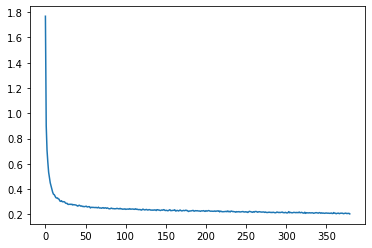

In [8]:
lr = 0.001

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)